In [1]:
%matplotlib inline
from numpySOM import SOM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data_prep/train.csv', header=None)

In [3]:
dataset.columns = ['duration', 'service', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'dst_host_count',
            'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate',
            'status']

In [4]:
dataset.head()

,duration,service,src_bytes,dst_bytes,count,srv_count,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,status
0,0,21,323,2172,22,27,255,255,0.00,0.00,0.0,0
1,0,17,12324,0,2,2,174,51,0.03,0.16,0.0,0
2,0,47,0,0,135,7,255,11,0.06,0.00,1.0,1
3,0,11,18,0,1,1,1,249,0.00,1.00,0.0,2
4,0,47,0,0,110,6,255,4,0.06,0.00,1.0,1


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [7]:
som = SOM(x=10, y=10, input_len=11, sigma=1, learning_rate=0.5)

In [8]:
som.random_weights_init(X)

In [9]:
som.train_random(X, num_iteration=100)

In [10]:
from pylab import bone, pcolor, colorbar, plot, show

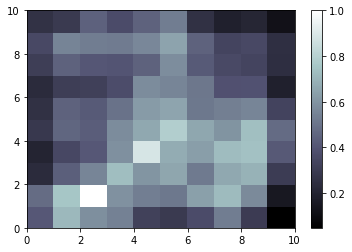

In [11]:
bone()
pcolor(som.distance_map().T)
colorbar()

In [12]:
mappings = som.win_map(X)

In [13]:
attacks = np.concatenate((mappings[(2, 4)], mappings[(8, 1)]))

In [14]:
attacks = sc.inverse_transform(attacks)

In [15]:
len(attacks)

20

In [16]:
column_names = ['duration', 'service', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'dst_host_count',
            'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate']

In [17]:
for attack in attacks:
    i_loc = dataset.loc[(dataset['duration'] == attack[0]) & (dataset['service'] == attack[1]) & 
            (dataset['src_bytes'] == attack[2]) & (dataset['dst_bytes'] == attack[3]) & (dataset['count'] == attack[4])
            & (dataset['srv_count'] == attack[5])& (dataset['dst_host_count'] == attack[6])& 
            (dataset['dst_host_srv_count'] == attack[7])].index
    print(i_loc)

Int64Index([5], dtype='int64')
Int64Index([824], dtype='int64')
Int64Index([1895], dtype='int64')
Int64Index([2549], dtype='int64')
Int64Index([3259], dtype='int64')
Int64Index([3913], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([5826], dtype='int64')
Int64Index([6657], dtype='int64')
Int64Index([7294], dtype='int64')
Int64Index([7745], dtype='int64')
Int64Index([7944], dtype='int64')
Int64Index([8883], dtype='int64')
Int64Index([9383], dtype='int64')
Int64Index([2184], dtype='int64')
Int64Index([2417], dtype='int64')
Int64Index([3659], dtype='int64')
Int64Index([3930], dtype='int64')
Int64Index([6883], dtype='int64')
Int64Index([7522], dtype='int64')


In [18]:
dataset.iloc[8650]

duration                         0.0
service                         17.0
src_bytes                      748.0
dst_bytes                        0.0
count                            1.0
srv_count                        1.0
dst_host_count                   2.0
dst_host_srv_count             118.0
dst_host_diff_srv_rate           1.0
dst_host_same_src_port_rate      0.5
dst_host_serror_rate             0.0
status                           0.0
Name: 8650, dtype: float64

In [61]:
test_dataset = pd.read_csv('data_prep/probe_test.data', header=None, delimiter=' ')

In [62]:
test_dataset = test_dataset.iloc[:, 2:]

In [63]:
test_dataset.columns = ['duration', 'service', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'dst_host_count',
            'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate']

In [64]:
test_dataset.head()

,duration,service,src_bytes,dst_bytes,count,srv_count,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate
0,0,11,18,0,1,1,1,1,0.0,1.0,0.0
1,0,11,18,0,1,1,1,2,0.0,1.0,0.0
2,0,11,18,0,1,1,1,71,0.0,1.0,0.0
3,0,11,18,0,1,1,1,78,0.0,1.0,0.0
4,0,11,18,0,1,1,1,9,0.0,1.0,0.0


In [65]:
som.winner(test_dataset.iloc[0].values)

(0, 9)

In [66]:
som.distance_map()[5][9]

0.5302836973760501